<a href="https://colab.research.google.com/github/nibinkjoseph/code_snippets/blob/master/Health_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing the libraries needed

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")


In [3]:
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

In [4]:
train  = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [6]:
test.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111


In [7]:
print("Shape of train dataset ",train.shape )
print("Shape of test dataset ",test.shape )

Shape of train dataset  (381109, 12)
Shape of test dataset  (127037, 11)


In [8]:
#checking for null values

train.isnull().sum()

#we founnd that there are no null values in the dataset

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
train.isnull().values.any()

False

In [10]:
train = train.dropna(how='any',axis=0)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 37.8+ MB


In [12]:
#Code to find numeric data
numeric_data = train.select_dtypes(include = np.number)
numeric_col = numeric_data.columns
numeric_data.head(1)

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,40454.0,26.0,217,1


In [13]:
#code to find categorical data
categorical_data = train.select_dtypes(exclude= np.number)
categorical_col = categorical_data.columns
categorical_data.head(1)

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes


In [14]:
a = train['Response'].value_counts()/len(train)*100
b = train['Gender'].value_counts()
c = train['Vehicle_Age'].value_counts()
d = train['Vehicle_Damage'].value_counts()

print(a)
print('\n')
print(b)
print('\n')
print(c)
print('\n')
print(d)




0    87.743664
1    12.256336
Name: Response, dtype: float64


Male      206089
Female    175020
Name: Gender, dtype: int64


1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64


Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64


**Exploratory** **data analysis**

In [15]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [16]:
#Split the data set into numerical and categorical variables
numerical_columns = ['Age', 'Region_Code', 'Annual_Premium', 'Vintage']
categorical_columns =['Gender', 'Driving_License', 'Previously_Insured','Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response' ] 

In [17]:
train[numerical_columns].describe()

#The maximum age given is 85
#50% people are at the age of 36
#mean is 38.8
#standard deviation is 15.5

,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


In [18]:
col = train.columns.tolist()
col.remove('id')
train[col].describe(percentiles = [.25,.50,.75,.95,.99])

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
95%,69.000000,1.000000,47.000000,1.000000,55176.000000,160.000000,285.000000,1.000000
99%,77.000000,1.000000,50.000000,1.000000,72963.000000,160.000000,297.000000,1.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [19]:
# In the Annual_Premium the 99th percentile is 72544 and the max is 540165 this represents the outliers in this column. Hence it is an outlier

In [20]:
#Here we have Response as the Independent varaiable or the target variable

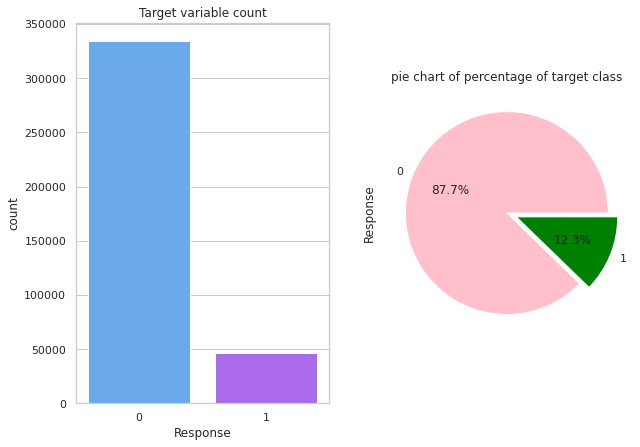

In [21]:
plt.subplot(1,2,1)
sns.countplot(train['Response'],palette = 'cool')
plt.title("Target variable count")



plt.subplot(1,2,2)
count = train['Response'].value_counts()
count.plot.pie(    autopct = '%1.1f%%',   colors=['pink', 'green'], figsize= (10,7), explode= [0,0.1], title = "pie chart of percentage of target class")

From the diagram we read that it is an imbalanced binary problem
Only 12.3 % customers are interested

In [22]:
print( "Percentage of target class\n")
print(train['Response'].value_counts()/len(train)*100)

Percentage of target class

0    87.743664
1    12.256336
Name: Response, dtype: float64


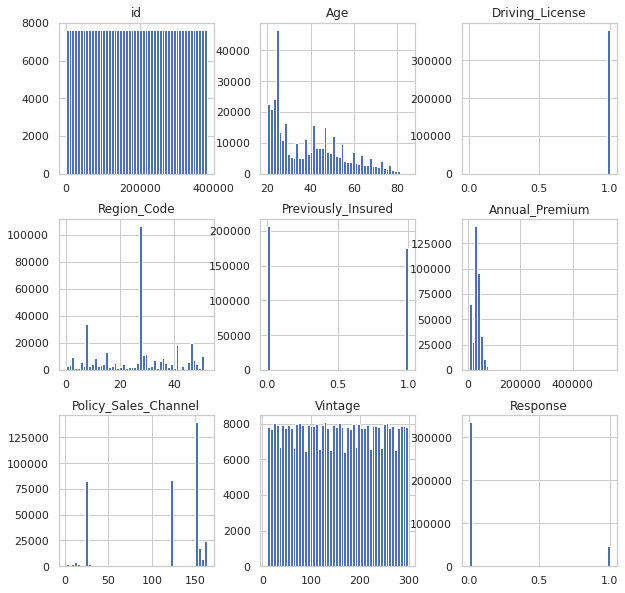

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins= 50, figsize= (10,10))
plt.show()

Plot on Gender

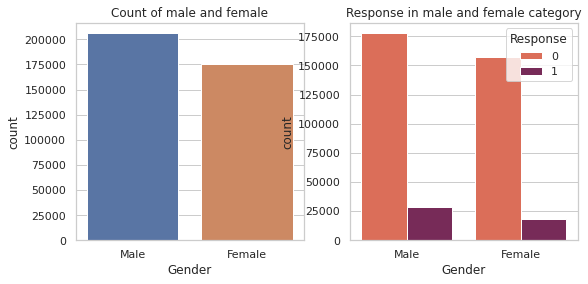

In [24]:
plt.figure(figsize= (9,4))
plt.subplot(1,2,1)
sns.countplot(train['Gender'])
plt.title("Count of male and female")



plt.subplot(1,2,2)
sns.countplot(train['Gender'], hue= train['Response'], palette= "rocket_r")
plt.title("Response in male and female category")
plt.show()


In [25]:
train['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [26]:
#There are 30619 males and 26223 females

#The chance that male would buy the insurance is high than females

EDA on Age

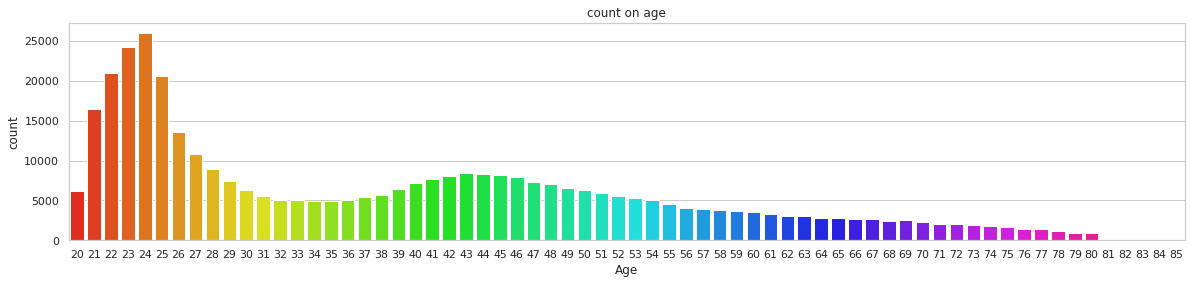

In [27]:
plt.figure(figsize=(20,4))
sns.countplot(train['Age'], palette= 'hsv')
plt.title("count on age")
plt.show()

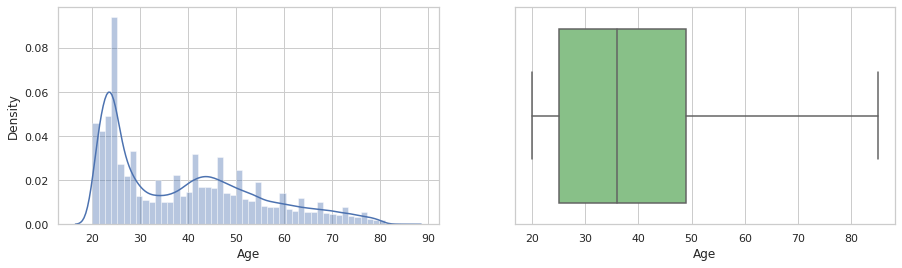

In [28]:
plt.figure(figsize= (15,4))
plt.subplot(1,2,1)
sns.distplot(train['Age'])


plt.subplot(1,2,2)
sns.boxplot(train['Age'], palette= 'Accent')

EDA on Driving License

Percentage of  Driving_License feature
 
1    99.786938
0     0.213062
Name: Driving_License, dtype: float64


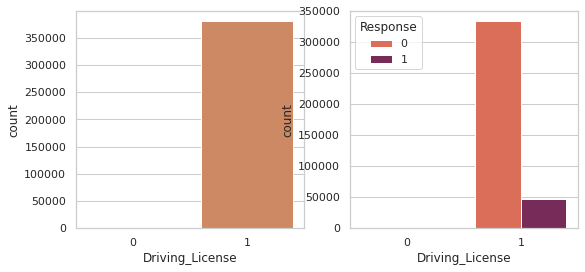

In [29]:
plt.figure(figsize= (9,4))
plt.subplot(1,2,1)
sns.countplot(train['Driving_License'])


plt.subplot(1,2,2)
sns.countplot(train['Driving_License'], hue= train['Response'], data= train, palette= "rocket_r")

print("Percentage of  Driving_License feature\n ")
print(train['Driving_License'].value_counts()/len(train)*100)

In [30]:
#Customers who have the DL are 99%
#Among people has DL who need insurance is less compared to who require no insurance

Region distribution

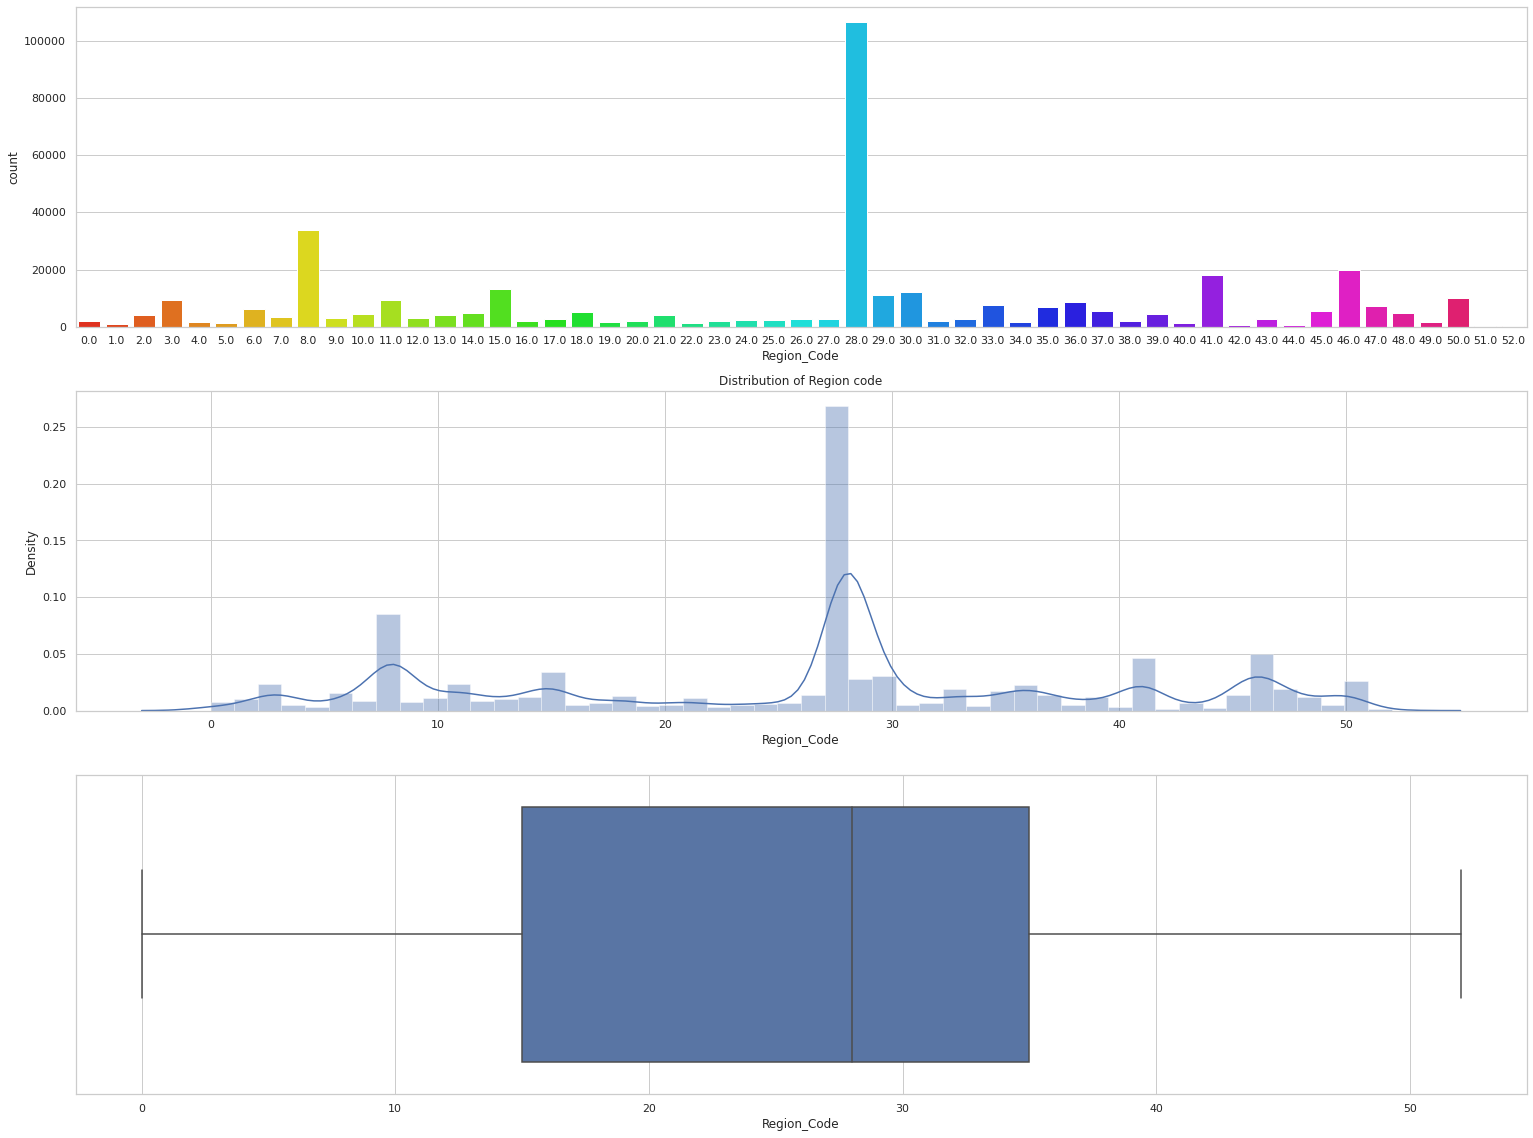

In [31]:
plt.figure(figsize=(26,20))
plt.subplot(3,1,1)
sns.countplot(train["Region_Code"], data= train, palette= 'hsv')


plt.subplot(3,1,2)
sns.distplot(train['Region_Code'])
plt.title('Distribution of Region code')


plt.subplot(3,1,3)
sns.boxplot(train['Region_Code'])


In [32]:
#Customers from Region Code 28 has more chance of buying insurance

EDA on Previously Insured

Percentage of Previously_Insured feature 
0    54.178988
1    45.821012
Name: Previously_Insured, dtype: float64


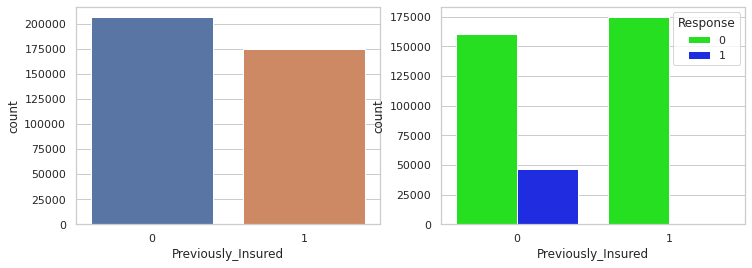

In [33]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(train['Previously_Insured'])

plt.subplot(1,2,2)
sns.countplot(train['Previously_Insured'], hue=train['Response'], palette= 'hsv' )

print("Percentage of Previously_Insured feature ")
print(train['Previously_Insured'].value_counts()/len(train)*100)

In [34]:
#Cutomers who has not previously insured are likely to be interested

Vehicle Age analysis

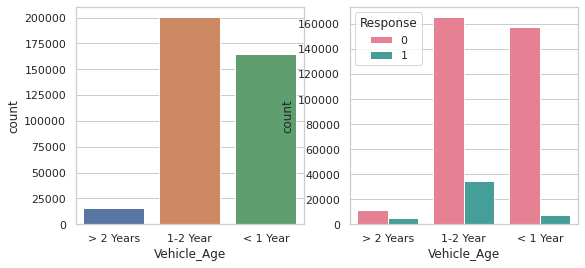

In [35]:
plt.figure(figsize =(9,4))
plt.subplot(1,2,1)
sns.countplot(train['Vehicle_Age'])

plt.subplot(1,2,2)
sns.countplot(train['Vehicle_Age'], hue=train['Response'], palette = 'husl')

In [36]:
#There are less number of customers with vehicle age greater than 2 years
#customers with vehicle age 1-2 years are more likely to buy the insurance compared to other 

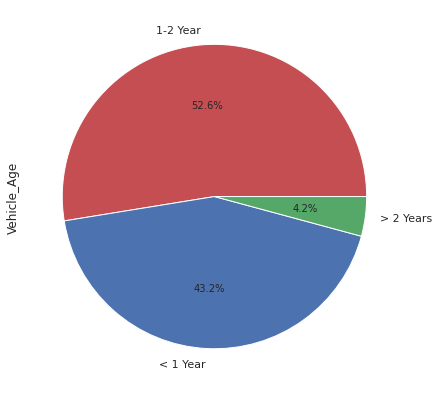

In [37]:
plt.figure(figsize=(7,7))
train['Vehicle_Age'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['r', 'b', 'g'])

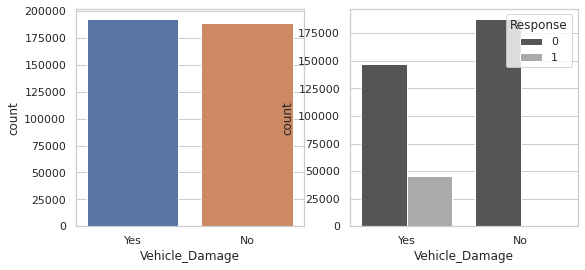

In [38]:
#Damage Vehicle and Response

plt.figure(figsize= (9,4))
plt.subplot(1,2,1)
sns.countplot(train['Vehicle_Damage'])


plt.subplot(1,2,2)
sns.countplot(train['Vehicle_Damage'], hue= train['Response'], palette ='binary_r')

In [39]:
#Customers with vehicle damage are equallly distributed
#Customers with vehicle damage are more interested in the insurance

Annual Premiums

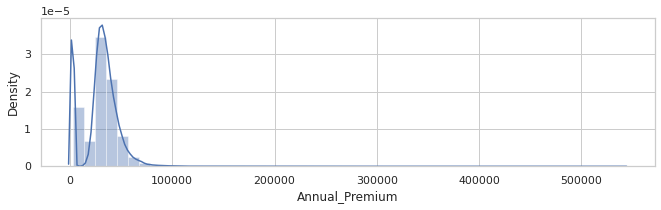

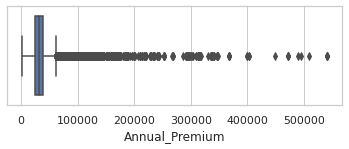

In [40]:
plt.figure(figsize =(11,6))
plt.subplot (2,1,1)
sns.distplot(train['Annual_Premium'])
plt.show()

plt.subplot(2,1,2)
sns.boxplot(train['Annual_Premium'])
plt.show()

In [41]:
#There are more outliers in the annual premium feature

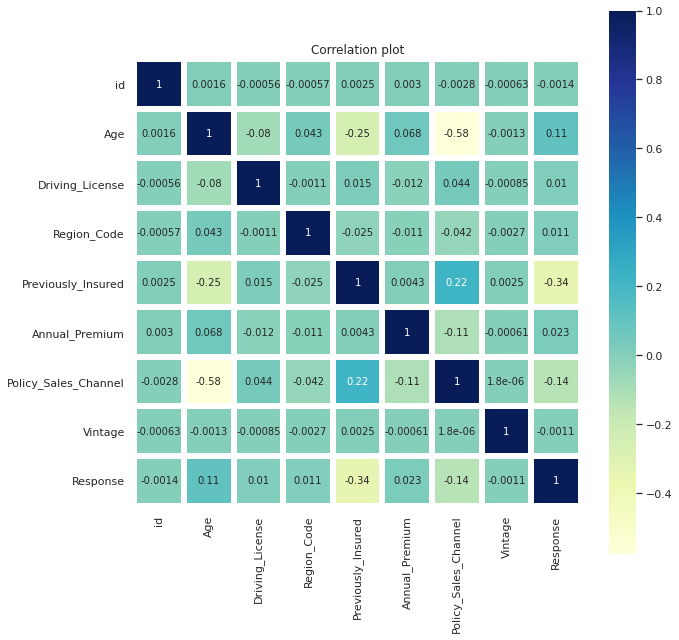

In [42]:
plt.figure(figsize=(10,10))
plt.title("Correlation plot")
sns.heatmap(train.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

In [43]:
#policy sales channel has slightly low correlation with Age variable

In [44]:
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [45]:
#Age vs Annual Premium

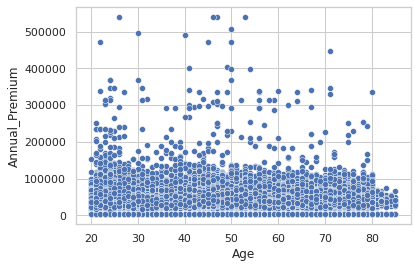

In [46]:
sns.scatterplot(x= train['Age'], y= train['Annual_Premium'])

In [47]:
df =train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
df

,Gender,Driving_License
0,Female,175020
1,Male,206089


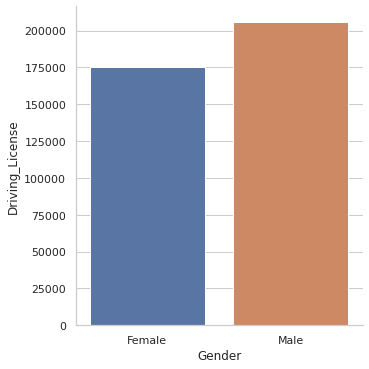

In [48]:
sns.catplot(x='Gender', y='Driving_License', data=df, kind='bar')

In [49]:
#Vintage= Number of Days, Customer has been associated with the company

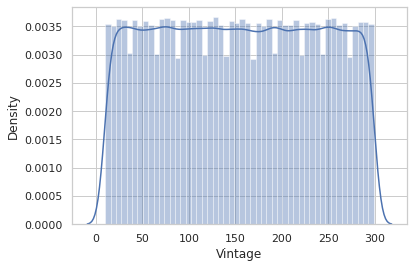

In [50]:
sns.distplot(train.Vintage)

# Data Preprocessing

In [63]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [64]:
train.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,NaN,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,NaN,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [66]:
train['Gender'] = train['Gender'].map({'Female' : 0, 'Male' : 1}).astype(int)

ValueError: ignored

In [51]:
le = LabelEncoder()
insurance_df['Gender'] = le.fit_transform(insurance_df['Gender'])
insurance_df['Driving_License'] = le.fit_transform(insurance_df['Driving_License'])
insurance_df['Previously_Insured'] = le.fit_transform(insurance_df['Previously_Insured'])
insurance_df['Vehicle_Damage'] = le.fit_transform(insurance_df['Vehicle_Damage'])
insurance_df['Driving_License'] = le.fit_transform(insurance_df['Driving_License'])
insurance_df['Vehicle_Age'] = le.fit_transform(insurance_df['Vehicle_Age']) 

NameError: ignored

In [ ]:
insurance_df=insurance_df[['Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response']]

Modelling


In [ ]:
X = df_train.drop(["Response"], axis=1).to_numpy()
y = df_train['Response'].values

In [ ]:
np.random.seed(42)
models = {"Logistic Regression": LogisticRegression(max_iter=10000), 
          "Random Forest": RandomForestClassifier(),
          "GradientBoostingClassifier" : GradientBoostingClassifier()}


# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True)



for name, model in models.items():
    
    # Create list for ROC AUC scores
    roc_auc_score_list = []
    
    for train_index, test_index in skf.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)

        roc_auc_score_list.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.plot(fpr, tpr)
     print(f'Mean roc_auc_score {name} : {np.mean(roc_auc_score_list)}')

     #https://www.kaggle.com/dietzschdaniel/who-will-buy-your-insurance

     #https://www.kaggle.com/ankityadav98/insurance-prediction-lgbm-eda-86-28

     #https://www.kaggle.com/sunilhule/rank-48-solution-insurance-prediction

     #https://www.kaggle.com/tanujdhiman/health-insurance-cross-sell-prediction

     #https://www.kaggle.com/ayushikaushik/eda-oversampling-classification

     #https://www.kaggle.com/drfrank/insurance-prediction-lgbm-gbm-xgboost-eda

     #

